# Introduction to Lotka-Volterra Competition

In [61]:
using Parameters
using DifferentialEquations
using ForwardDiff
using PyPlot
using Interact

# Introduction/Overview
This notebook is simply looking at the two species L-V competiti9on model. Here, we are exploring the geometry and dynamics of this model.

# Model and Equilibria
The model we will use is the classical LV competition model:

In [3]:
# Inplace definition (the `du` array is passed to the function and changed), the default way to define this in Julia.
function lv_comp(du, u, p, t)
    @unpack r1, r2, α12, α21, K1, K2 = p
    du[1] = u[1] * r1 * (1 - (u[1] + α12 * u[2]) / K1)
    du[2] = u[2] * r2 * (1 - (u[2] + α21 * u[1]) / K2)
    return
end

# Make a version that allocates the output `du`, useful for symbolic calculations
function lv_comp(u, p, t)
    du = similar(u)
    lv_comp(du, u, p, t)
    return du
end

lv_comp (generic function with 2 methods)

# Model Parameters

In [4]:
@with_kw mutable struct LVPar
    α12 = 0.8
    α21 = 0.3
    r1 = 1.0
    r2 = 2.0
    K1 = 1.5
    K2 = 1.0
end

LVPar

In [10]:
p1=LVPar()
p1.K1

1.5

# Evaluationg the model -- time series

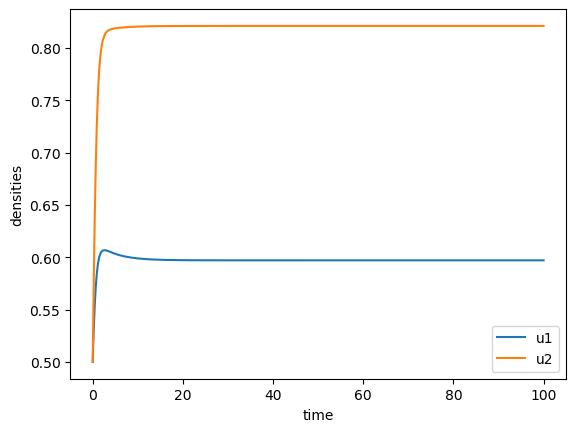

In [60]:
u0 = [0.5, 0.5]
t_span = (0.0, 100.0)

f1 = figure()
    p = LVPar(α12 = 1.1)
    prob = ODEProblem(lv_comp, u0, t_span, p)
    sol = solve(prob, reltol = 1e-8)
    withfig(f1, clear = true) do
        plot(sol.t, sol.u)
    xlabel("time")
    ylabel("densities")
    legend(("u1","u2"))
    end
    #plot(sol)
    #xlabel!("time")
    #ylabel!("Density")

In [62]:
u0 = [0.5, 0.5]
t_span = (0.0, 100.0)

f1 = figure()
@manipulate for α12 in slider(0.1:0.01:2.0; label = "α12", value = 0.8), 
                α21 in slider(0.1:0.01:2.0; label = "α21", value = 0.3), 
                K1 in slider(0.1:0.01:3.0; label = "K1", value = 1.5), 
                K2 in slider(0.1:0.01:3.0; label = "K2", value = 1.0),
                r1 in slider(0.1:0.01:10.0; label = "r1", value = 1.0),
                r2 in slider(0.1:0.01:10.0; label = "r2", value = 2.0)
    p = LVPar(α12 = α12, α21 = α21, K1 = K1, K2 = K2, r1 = r1, r2 = r2)
    prob = ODEProblem(lv_comp, u0, t_span, p)
    sol = solve(prob, reltol = 1e-8)
    withfig(f1, clear = true) do
        plot(sol.t, sol.u)
    end
    #plot(sol)
    #xlabel!("time")
    #ylabel!("Density")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α12"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 191,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
71, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/carlingbieg/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carlingbieg/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carlingbieg/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carlingbieg/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carlingbieg/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000134a31210, Task (runnable) @0x0000000134a31210), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\",\"0.32\",\"0.33\",\"0.


# Equilibria and Isoclines

From the above equations we can generate the Jacobian:

In [7]:
# Make a numerical (not symbolic version using the ForwardDiff.jl library. This is what you will want to do most of the time)
jac(u, p) = ForwardDiff.jacobian(u -> lv_comp(u, p, NaN), u)

jac (generic function with 1 method)

In [8]:
# Here we have the jacobian evaluated at the point `u = [0.5, 0.5]`, with the parameter set `par`
jac([0.5, 0.5], LVPar())

2×2 Array{Float64,2}:
  0.0666667  -0.266667
 -0.3        -0.3     

First solve for $f_1$ and $f_2$ to determine when functions are equal to 0 (i.e., when $du_1/dt$ and $du_2/dt = 0$). These are known as the isoclines, or nullclines, and describe the set of solutions when $u_1$ and $u_2$ do not change.

In [9]:
# We need to use a library for Symbolic calculations, a very common one is SymPy from the python language. Luckily Julia
# has excellent support for it.
using SymPy

┌ Info: Recompiling stale cache file C:\Users\gabrielgellner\.julia\compiled\v1.1\SymPy\KzewI.ji for SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1184


In [12]:
# We want to deal with all of these as symbolic variables, which are not the default type in Julia, unlike Mathematica.
@vars u1 u2
@vars r1 r2 a12 a21 K1 K2
# We need to make a symbolic parameter list, as `LVPar` is numeric
spar = Dict(
    :α12 => a12,
    :α21 => a21,
    :r1 => r1,
    :r2 => r2,
    :K1 => K1,
    :K2 => K2);

In [13]:
# we need to make symbolic versions of the model equations. We do this by calling the function with the symbolic parameters.
# the last parameter could be anythign as the time (`t`) argument is not used. I have set it to `NaN` which is a name for
# not a number.
f1, f2 = lv_comp([u1, u2], spar, NaN)

2-element Array{Sym,1}:
 r1*u1*(1 - (a12*u2 + u1)/K1)
 r2*u2*(1 - (a21*u1 + u2)/K2)

In [14]:
sympy.solve(f1, u1)

2-element Array{Sym,1}:
           0
 K1 - a12*u2

In [15]:
sympy.solve(f1, u2)

1-element Array{Sym,1}:
 (K1 - u1)/a12

In [16]:
sympy.solve(f2, u1)

1-element Array{Sym,1}:
 (K2 - u2)/a21

In [17]:
sympy.solve(f2, u2)

2-element Array{Sym,1}:
           0
 K2 - a21*u1

We want to solve our equations for $u_1$ so that we can plot the isoclines as a function of $u_1$ ($u_1$ on the y-axis), but here I am keeping all possible solutions, with respect to both $u_1$ and $u_2$. You should be able to see that the first two solutions ($u_1 = K_1 - \alpha_{12}u_2$ and $u_2 = (K_1 - u_1)/\alpha_{12}$) are equivalent.

The solutions $u_1 = K_1 - \alpha_{12}u_2$ and $u_1 = (K_2 - u_2)/\alpha_{21}$ are the equations for our isoclines for $du_1/dt = 0$ and $du_2/dt = 0$, respectively. We can find the interior equilibrium where these lines intersect (i.e., both $u_1$ and $u_2$ do not change). In this case we get one interior equilibrium, but note that in more complicated models we can get more interior equilibria.

## Now plot the isoclines
We will again use the `manipulate` function to see how our parameters change the isoclines. This can immediately tell us a lot about our equilibria and stability.

In [52]:
function iso1(u2, p)
    @unpack α12, K1 = p
    return K1 - α12 * u2 / K1
end

function iso2(u2, p)
    @unpack α21, K2 = p
    return (K2 - u2) / α21
end

iso2 (generic function with 1 method)

In [53]:
f1 = figure()
u2s = range(0, 5, length = 100)
@manipulate for α12 in slider(0.1:0.01:1.0; label = "α12", value = 0.8), 
                α21 in slider(0.1:0.01:1.0; label = "α21", value = 0.3), 
                K1 in slider(0.1:0.01:2.0; label = "K1", value = 1.5), 
                K2 in slider(0.1:0.01:2.0; label = "K2", value = 1.0)
    p = LVPar(α12 = α12, α21 = α21, K1 = K1, K2 = K2)
    withfig(f1, clear = true) do
        plot(u2s, [iso1(u2, p) for u2 in u2s], label = "u1 = 0")
        plot(u2s, [iso2(u2, p) for u2 in u2s], label = "u2 = 0")
        xlim(0, 3)
        ylim(0, 5)
        xlabel("u2")
        ylabel("u1")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α12"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 91,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
71, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/carlingbieg/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carlingbieg/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carlingbieg/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carlingbieg/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carlingbieg/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012e046ad0, Task (runnable) @0x000000012e046ad0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\",\"0.32\",\"0.33\",\"0.3

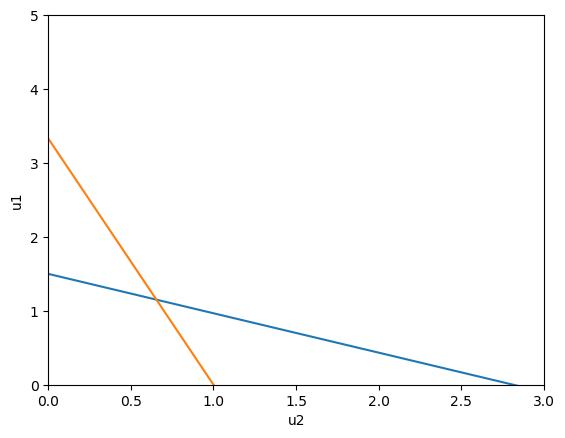

In [54]:
f1 = figure()
u2s = range(0, 5, length = 100)
    p = LVPar()
    withfig(f1, clear = true) do
        plot(u2s, [iso1(u2, p) for u2 in u2s], label = "u1 = 0")
        plot(u2s, [iso2(u2, p) for u2 in u2s], label = "u2 = 0")
        xlim(0, 3)
        ylim(0, 5)
        xlabel("u2")
        ylabel("u1")
    end